In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix

plt.rc('font', size=20)

pd.set_option('display.max_columns', None)

# Read data From File

In [3]:
covid_df = pd.read_excel("corona value - 08-04-99.xlsx")
covid_df.columns = covid_df.iloc[1]
covid_df = covid_df.drop(covid_df.index[[0,1,2,3,4]]).reset_index().drop('index', axis=1)


# Drop NaN Rows

In [4]:
covid_df = covid_df.dropna()
display(covid_df)
display(covid_df.describe())
display(covid_df.info())

1    Age (yr)  Gender pulse rate respiratory rate Tempreture Height Weight  \
0          73    male         64               22       36.6    155     60   
1          29  female         80               22       37.1    165     67   
4          34  female        102               22       37.2    170     53   
5          19    male        124               20       36.9    170     65   
6          13  female         89               18       36.3    155     54   
...       ...     ...        ...              ...        ...    ...    ...   
3474       52  female        120               19         36    173     85   
3475       75  female         92               18         37    160     50   
3477       39  female        125               23         37    162    106   
3478       56    male        150               24         35    168     65   
3479       68  female         75               26       36.2    150     72   

1       BMI Systolic blood presure Diastolic blood pressure sPO2%  \
0     24.97                    136                       41    98   
1     24.61                     94                       44    97   
4     18.34                    114                       47    96   
5     22.49                    123                       50    98   
6     22.48                    115                       51    96   
...     ...                    ...                      ...   ...   
3474   28.4                    156                      110    97   
3475  19.53                    183                      117    92   
3477  40.39                    185                      125    90   
3478  23.03                    231                      148    90   
3479     32                    185                      152    94   

1    Respratory distress Triage result Duration of starting complaints fever  \
0                      0             1                               1     0   
1                      0             1                               1     0   
4                      0             1                               1     1   
5                      0             1                               4     0   
6                      1             1                               1     1   
...                  ...           ...                             ...   ...   
3474                   0             3                               2     1   
3475                   0             3                               1     0   
3477                   0             3                               1     0   
3478                   0             3                               1     0   
3479                   1             3                               2     0   

1    chill cough sputum dyspnea chest pain body pain myalgia arthralgia  \
0        0     0      0       0          1         0       0          0   
1        1     1      0       0          0         0       1          0   
4        0     0      0       0          0         1       1          1   
5        0     1      0       1          0         0       0          0   
6        1     0      1       1          1         1       1          0   
...    ...   ...    ...     ...        ...       ...     ...        ...   
3474     1     1      1       1          1         0       0          0   
3475     0     1      0       0          0         1       1          0   
3477     0     1      0       1          1         1       0          0   
3478     0     1      1       0          0         0       0          0   
3479     1     1      0       1          0         0       0          0   

1    fatigue weakness sweating sore throat throat dryness headache  \
0          0        0        0           0              0        0   
1          0        1        0           1              0        0   
4          0        0        0           0              0        0   
5          0        1        0           0              0        1   
6          0        0 

1       Age (yr) Gender  pulse rate  respiratory rate  Tempreture  Height  \
count       2577   2577        2577              2577      2577.0    2577   
unique        83      2          99                22        48.0      55   
top           34   male         100                20        36.5     170   
freq          98   1418         128              1079       279.0     318   

1       Weight      BMI  Systolic blood presure  Diastolic blood pressure  \
count     2577  2577.00                    2577                      2577   
unique      91   825.00                     117                        90   
top         80    27.68                     120                        80   
freq       209    54.00                      96                       114   

1       sPO2%  Respratory distress  Triage result  \
count    2577                 2577           2577   
unique     20                    2              3   
top        96                    0              2   
freq      627                 2282           1302   

1       Duration of starting complaints  fever  chill  cough  sputum  dyspnea  \
count                              2577   2577   2577   2577    2577     2577   
unique                                4      2      2      2       2        2   
top                                   1      0      0      1       0        0   
freq                               1333   1848   1837   1297    2284     1629   

1       chest pain  body pain  myalgia  arthralgia  fatigue  weakness  \
count         2577       2577     2577        2577     2577      2577   
unique           2          2        2           2        1         2   
top              0          0        0           0        0         0   
freq          2002       1715     1996        2420     2577      1931   

1       sweating  sore throat  throat dryness  headache  nose stiffness  \
count       2577         2577            2577      2577            2577   
unique         2            2               2         2               2   
top            0            0               0         0               0   
freq        2313         2082            2326      2031            2376   

1       Laryngitis  anosmia  dysgeusia  epistaxia  conjectivitis  anorexia  \
count         2577     2577       2577       2577           2577      2577   
unique           2        2          2          2              2         2   
top              0        0          0          0              0         0   
freq          2504     2281       2380       2572           2526      2169   

1       nausea/vomiting  diarrhea  abd pain  severe abd pain  bloody diarrhea  \
count              2577      2577      2577             2577             2577   
unique                2         2         2                2                2   
top                   0         0         0                0                0   
freq               2143      2209      2347             2568             2568   

1       dysuria  ear pain  skin infection  cyanosis  decrease of consiousness  \
count      2577      2577            2577      2577                      2577   
unique        2         2               2         2                         2   
top           0         0               0         0                         0   
freq       2539      2520            2569      2573                      2570   

1       seizure  dowsiness  amnesia  without compalint  \
count      2577       2577     2577               2577   
unique        2          2        2                  1   
top           0          0        0                  0   
freq       2576       2515     2476               2577   

1       prolonged fever/dyspnea/cough  prolonged anorexia/nausea/vomiting  \
count                            2577                                2577   
unique                              2                                   2   
top                                 0                                   0   
freq        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2577 entries, 0 to 3479
Columns: 102 entries, Age (yr) to No previous treatment
dtypes: object(102)
memory usage: 2.0+ MB


None

# Plot Columns for Visioalization

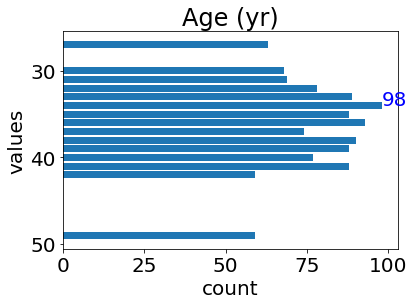

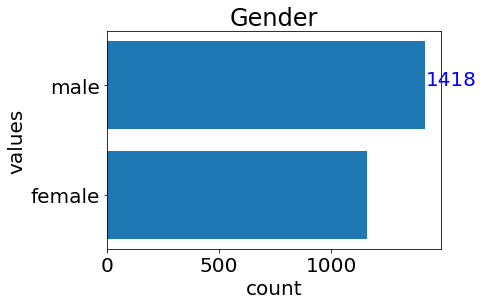

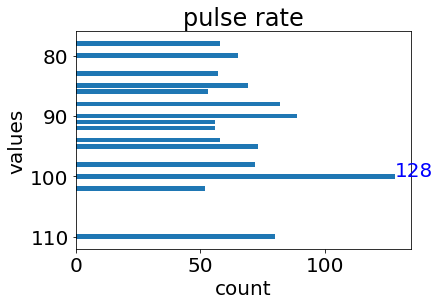

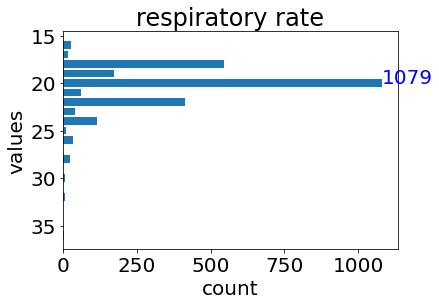

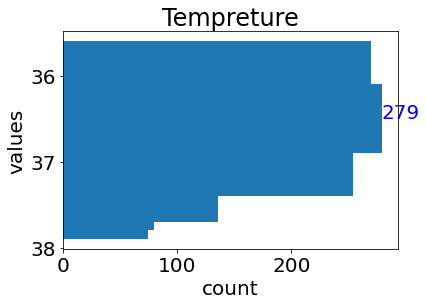

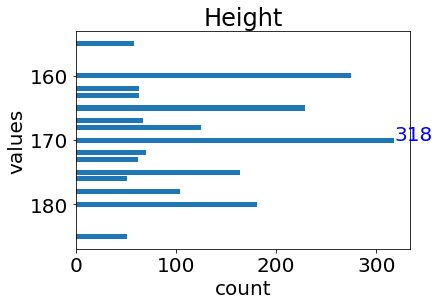

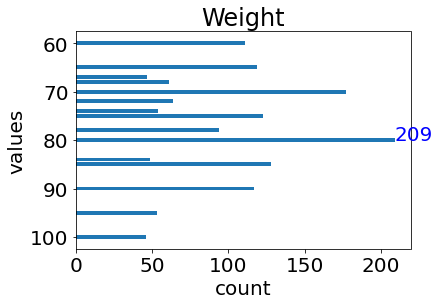

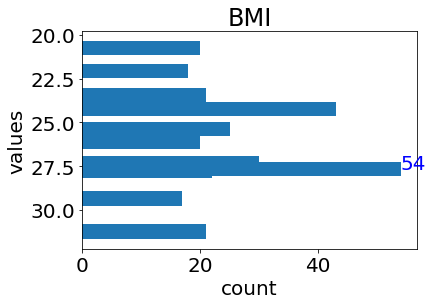

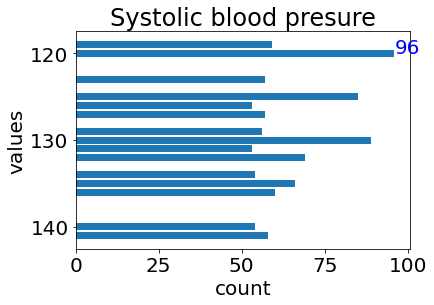

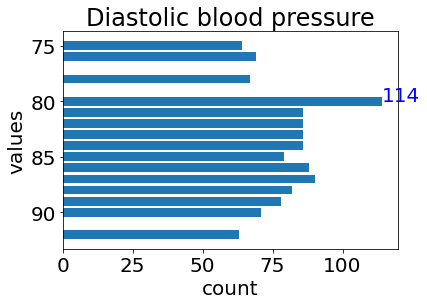

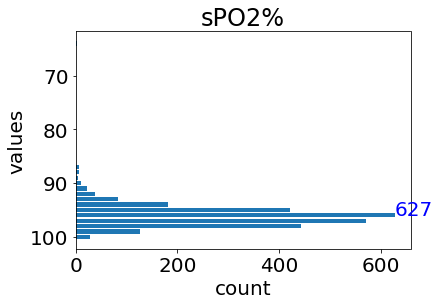

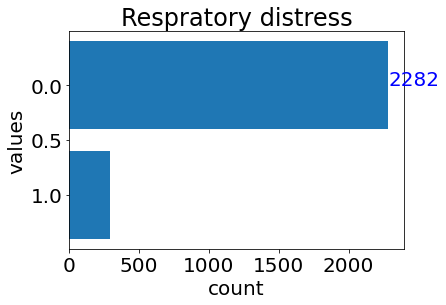

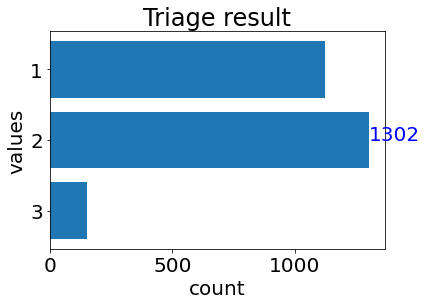

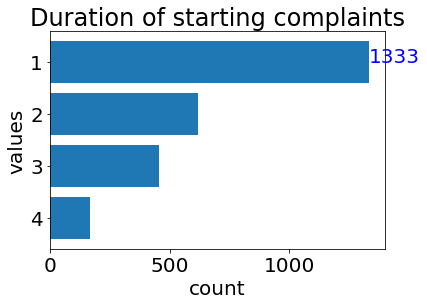

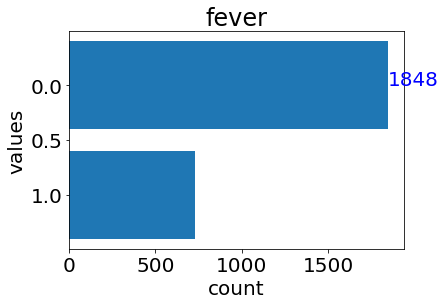

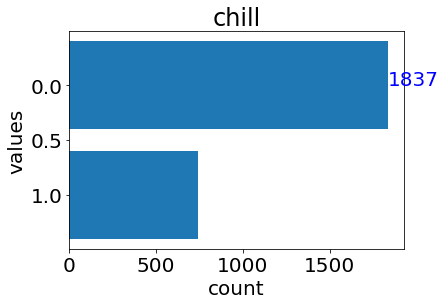

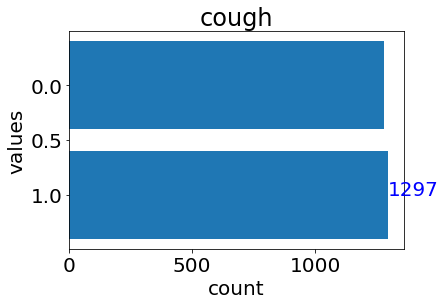

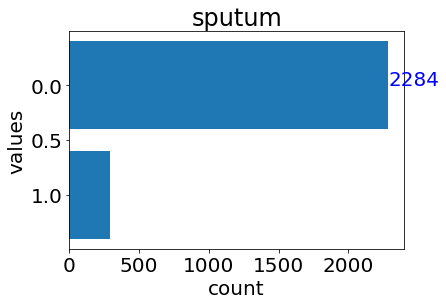

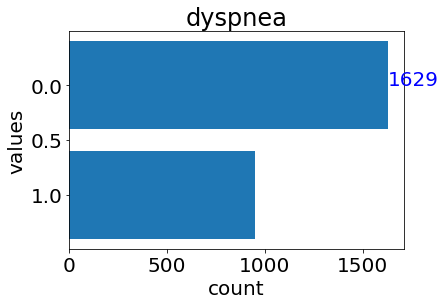

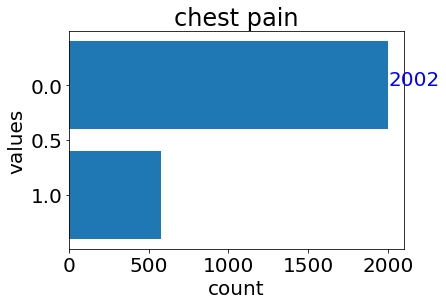

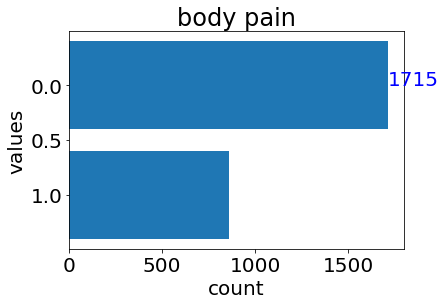

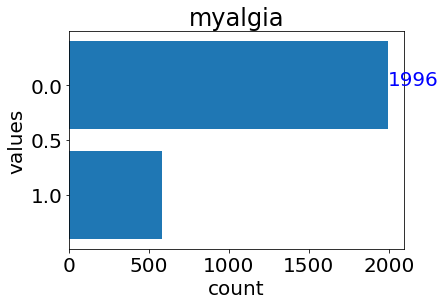

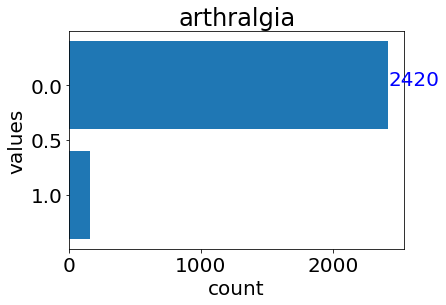

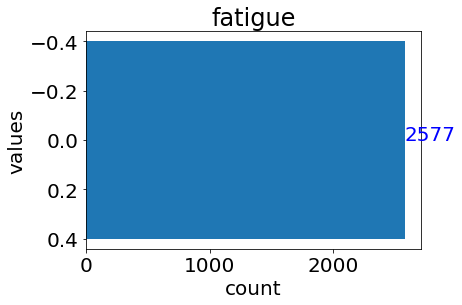

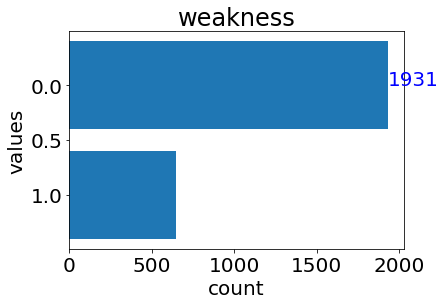

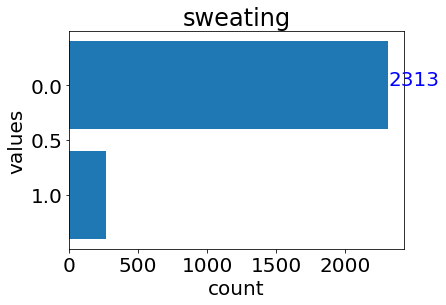

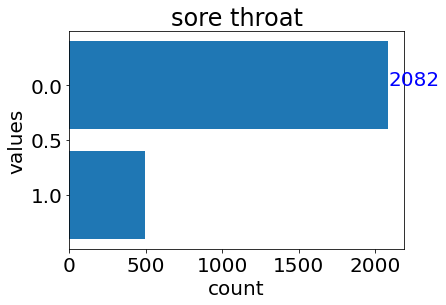

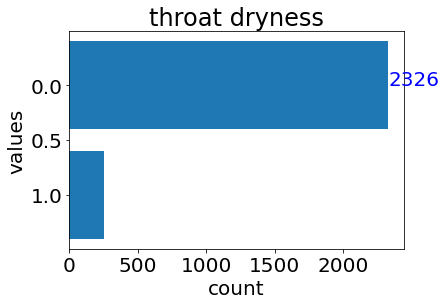

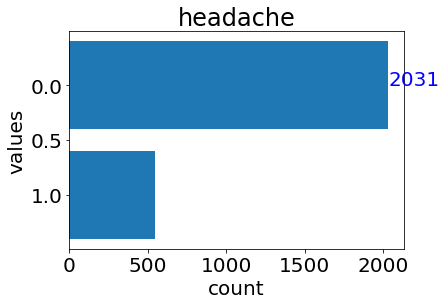

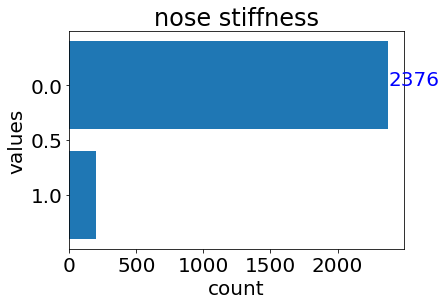

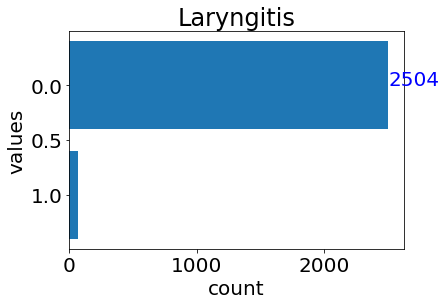

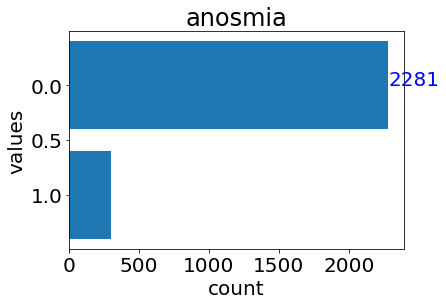

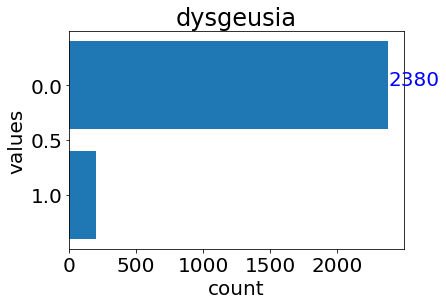

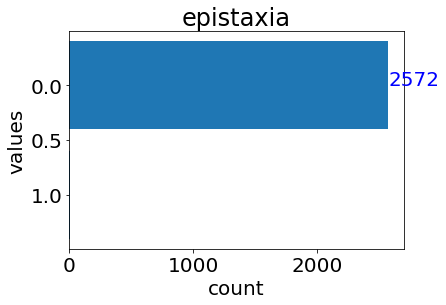

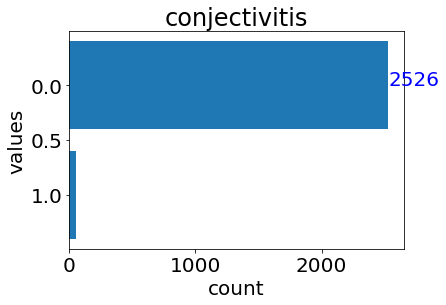

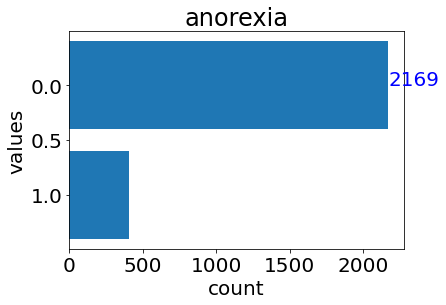

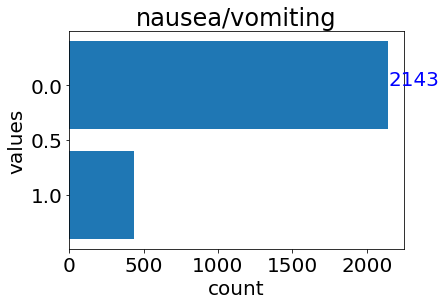

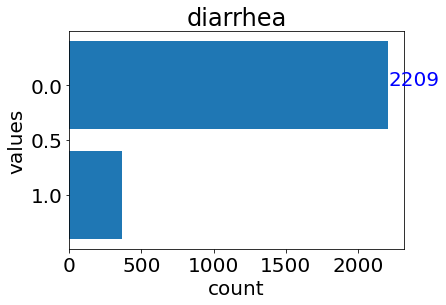

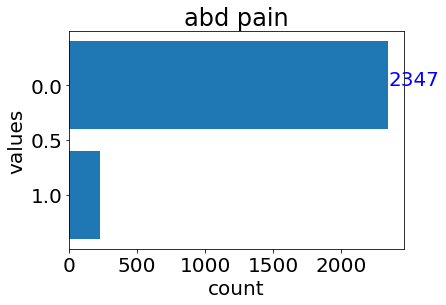

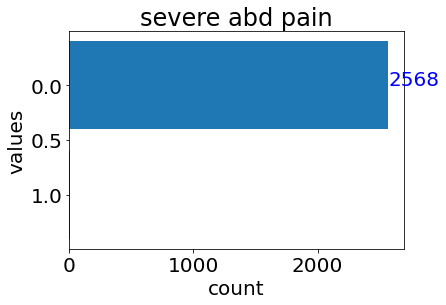

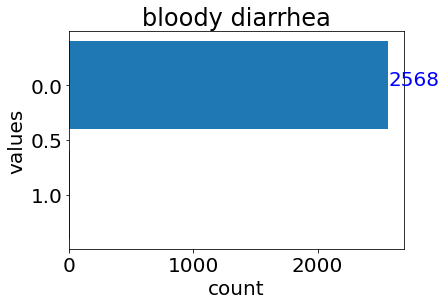

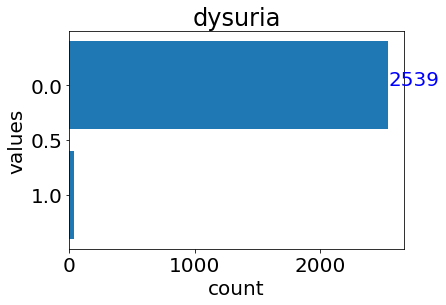

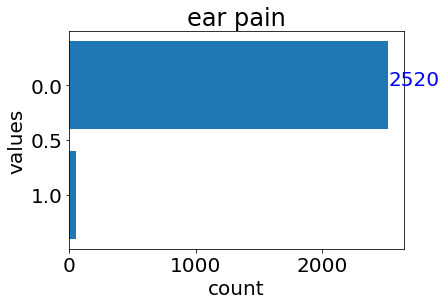

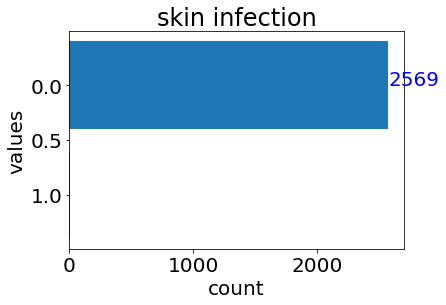

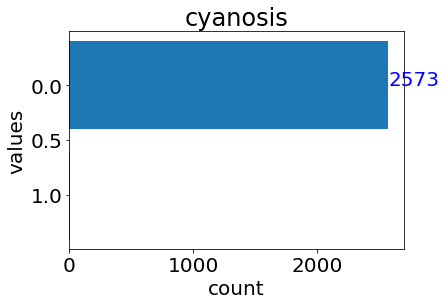

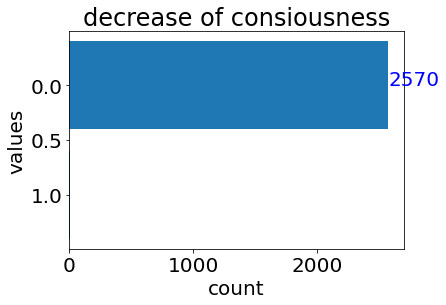

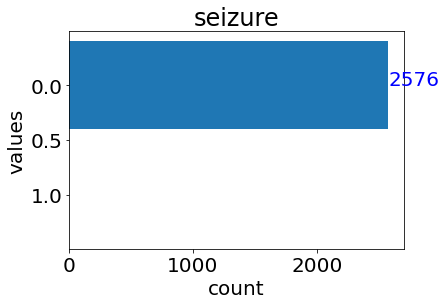

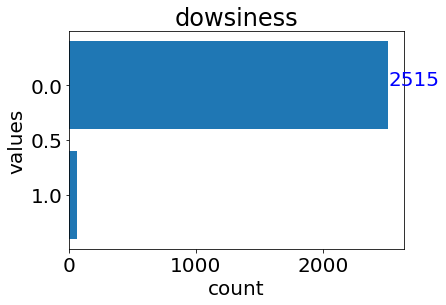

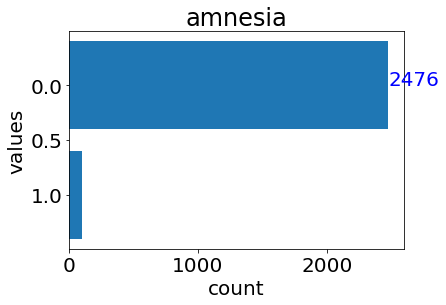

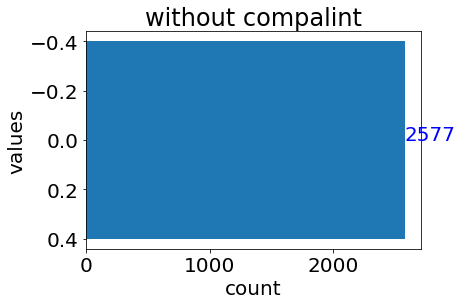

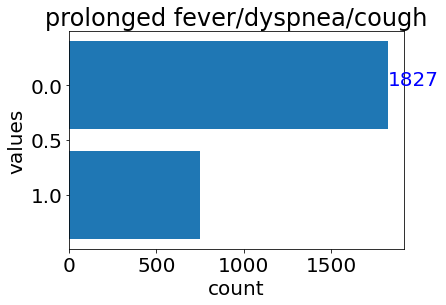

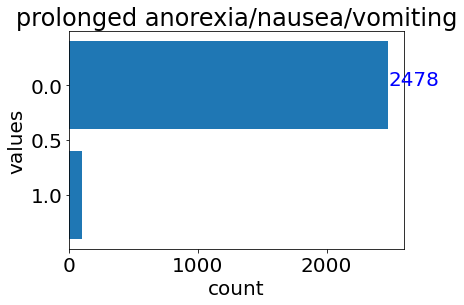

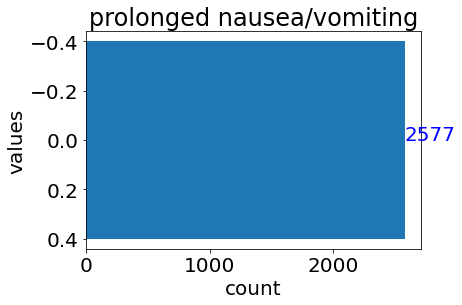

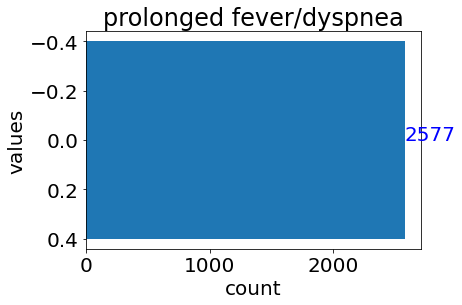

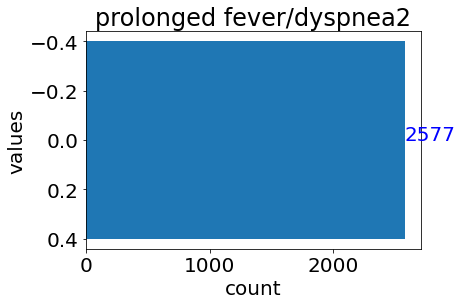

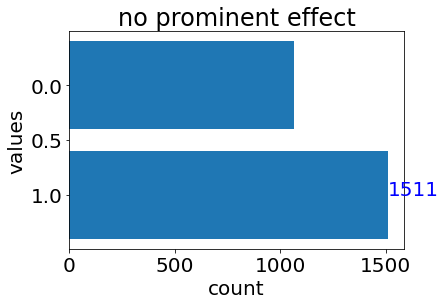

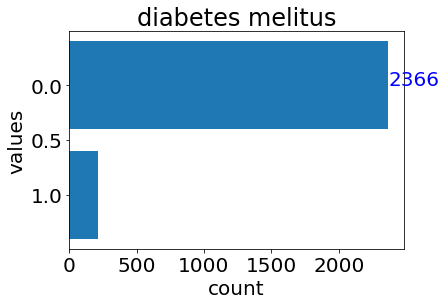

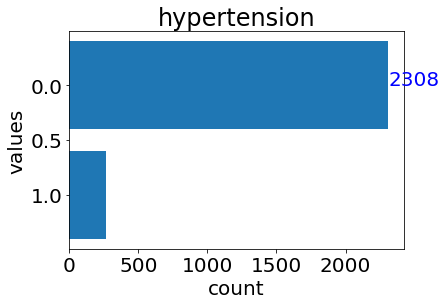

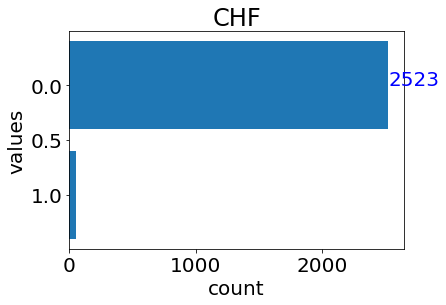

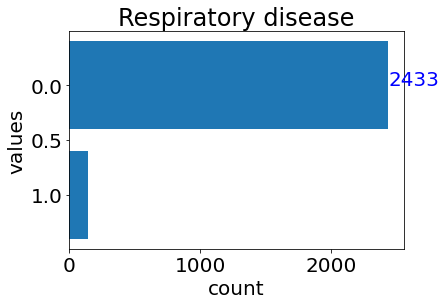

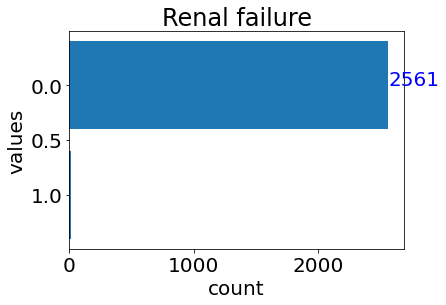

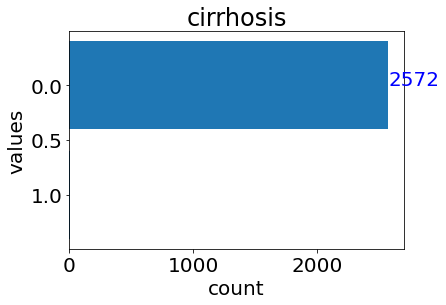

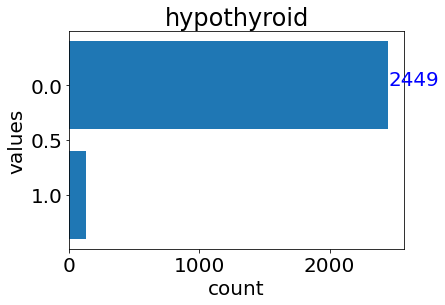

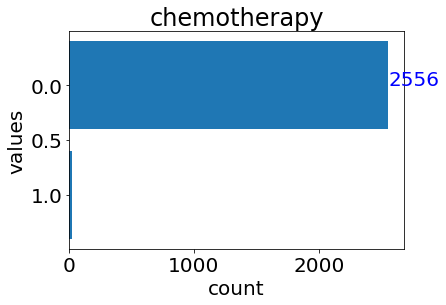

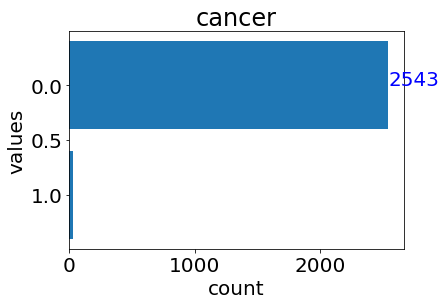

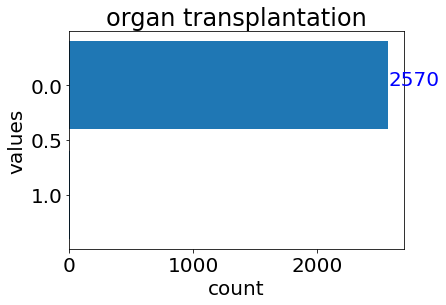

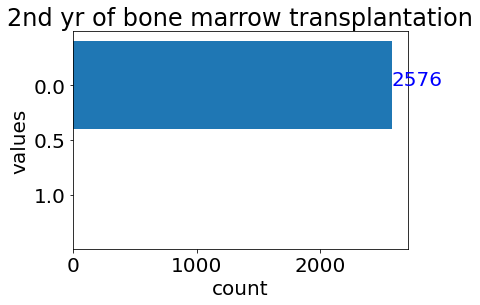

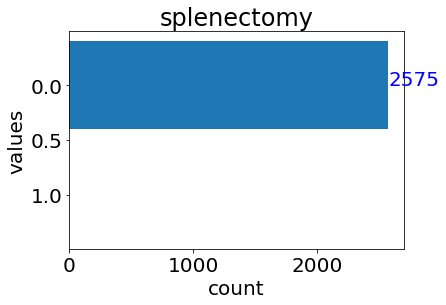

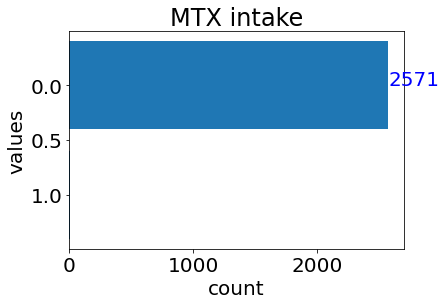

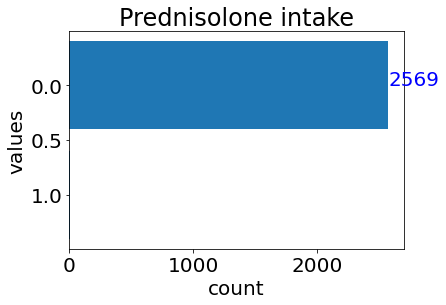

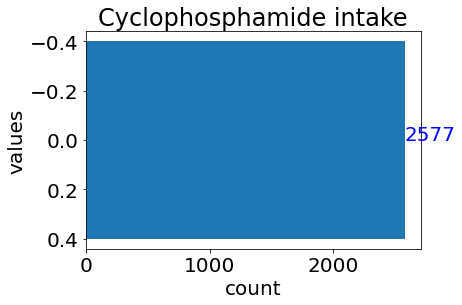

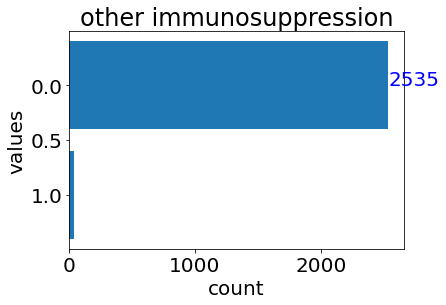

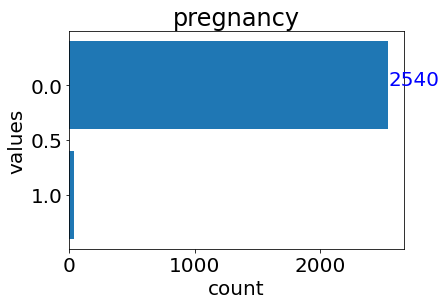

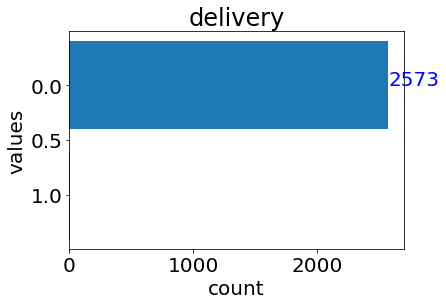

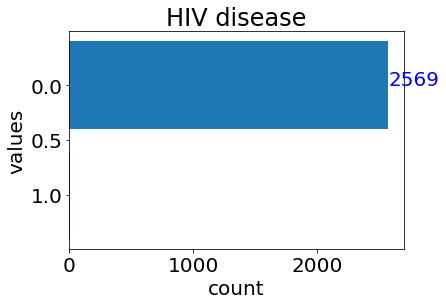

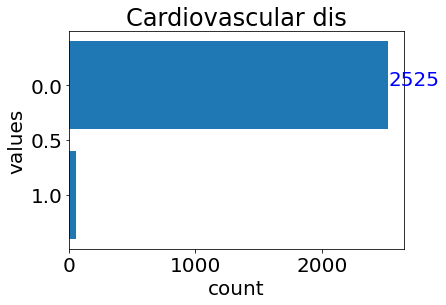

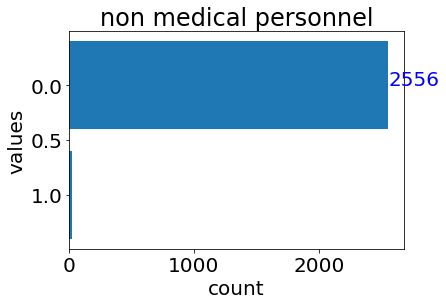

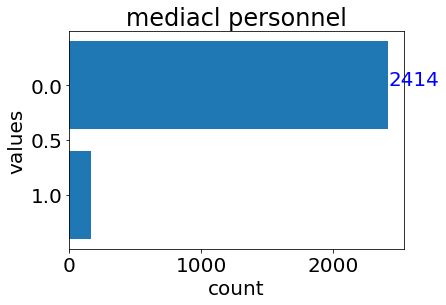

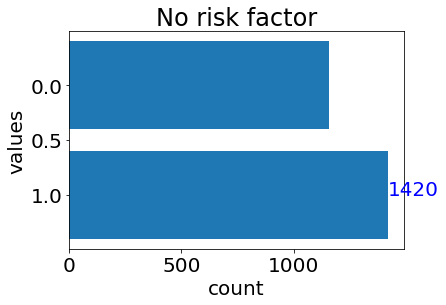

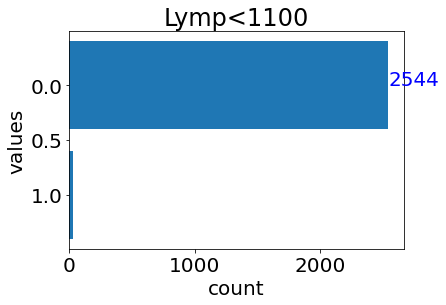

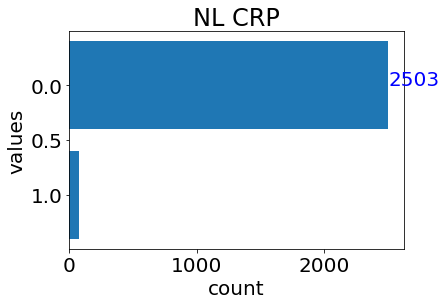

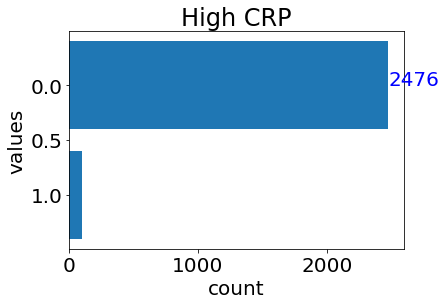

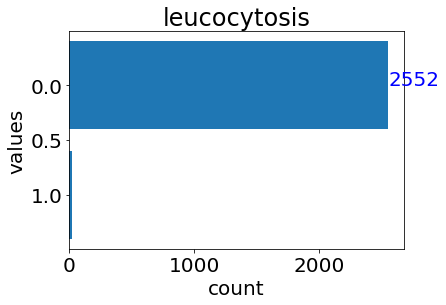

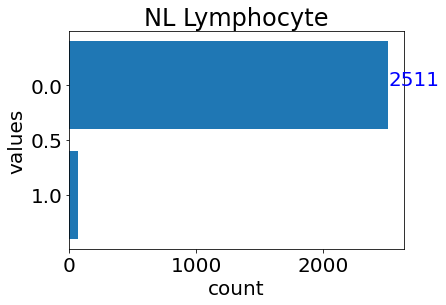

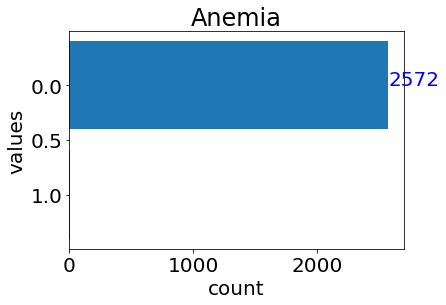

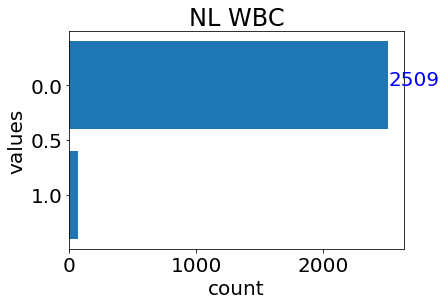

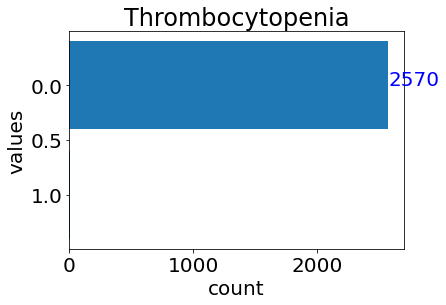

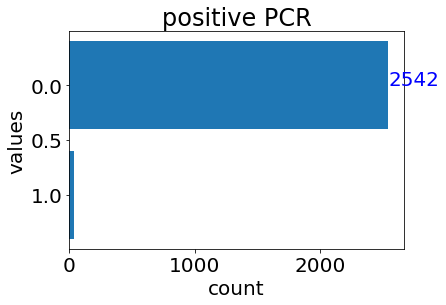

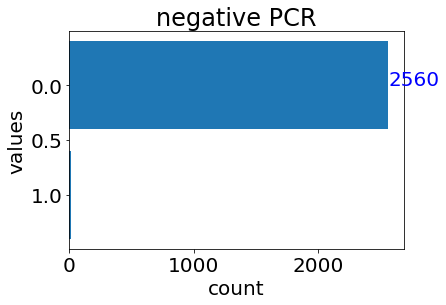

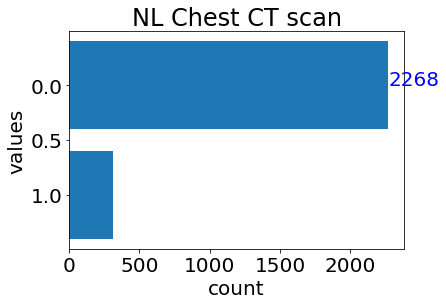

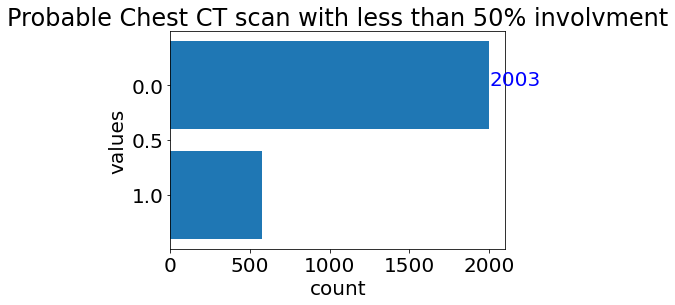

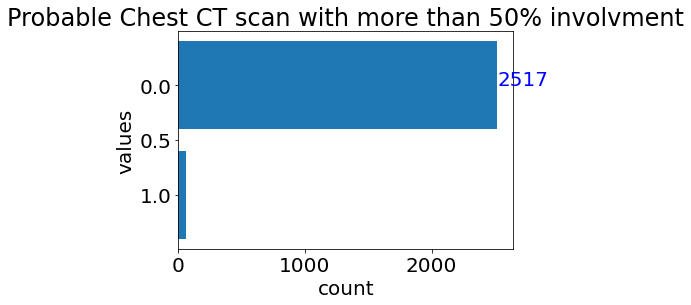

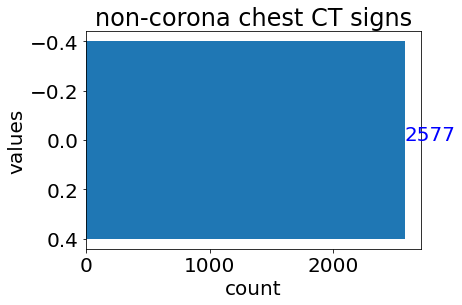

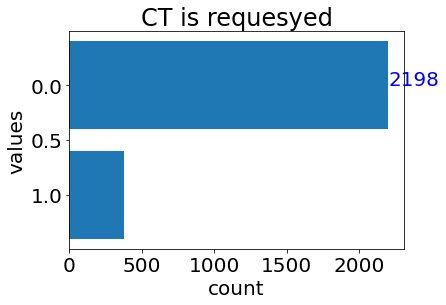

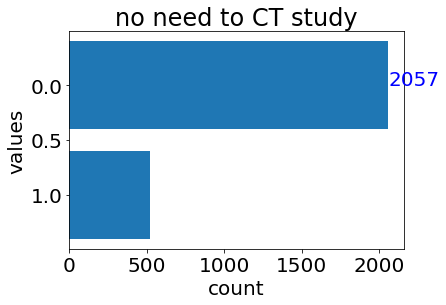

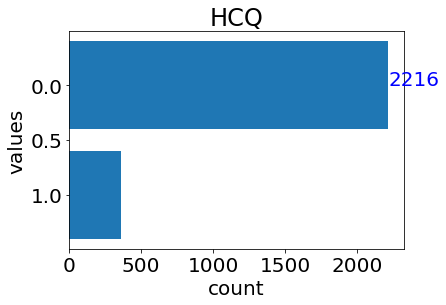

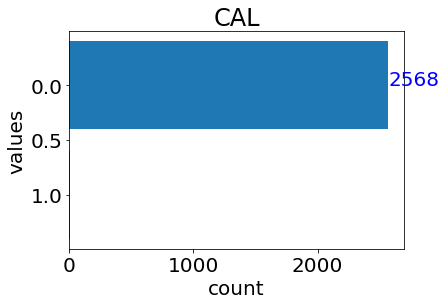

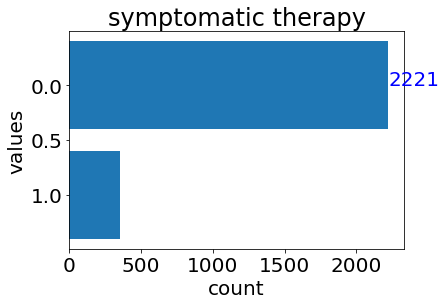

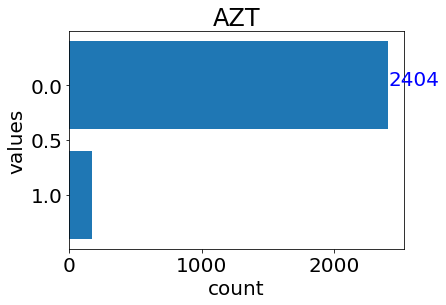

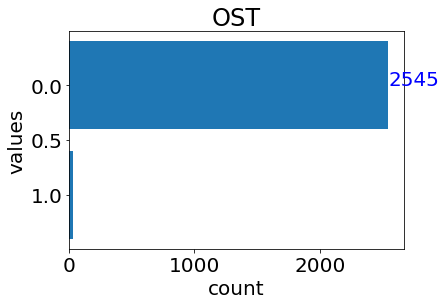

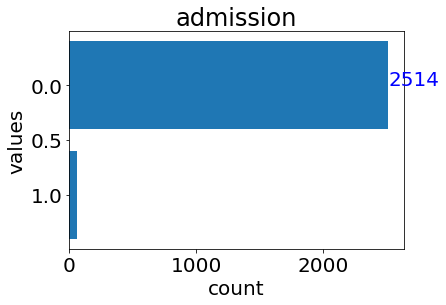

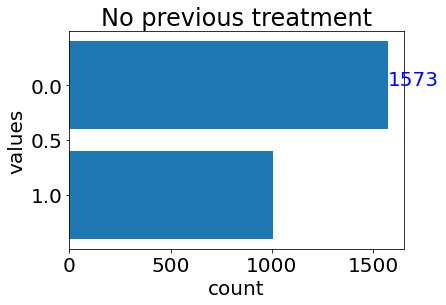

In [32]:
for column in covid_df.columns:
    column_count = Counter(list(covid_df[column].values))
    x, y = zip(*column_count.most_common(15))
    plt.figure()
    plt.barh(x, y)
    for i, val in enumerate(y):
        plt.annotate(val, (y[i], x[i]), color='b')
        plt.gca().invert_yaxis()
        plt.title(column)
        plt.ylabel('values')
        plt.xlabel('count')
        plt.grid(False, axis='y')
        plt.show()
        break

# Features heatmap

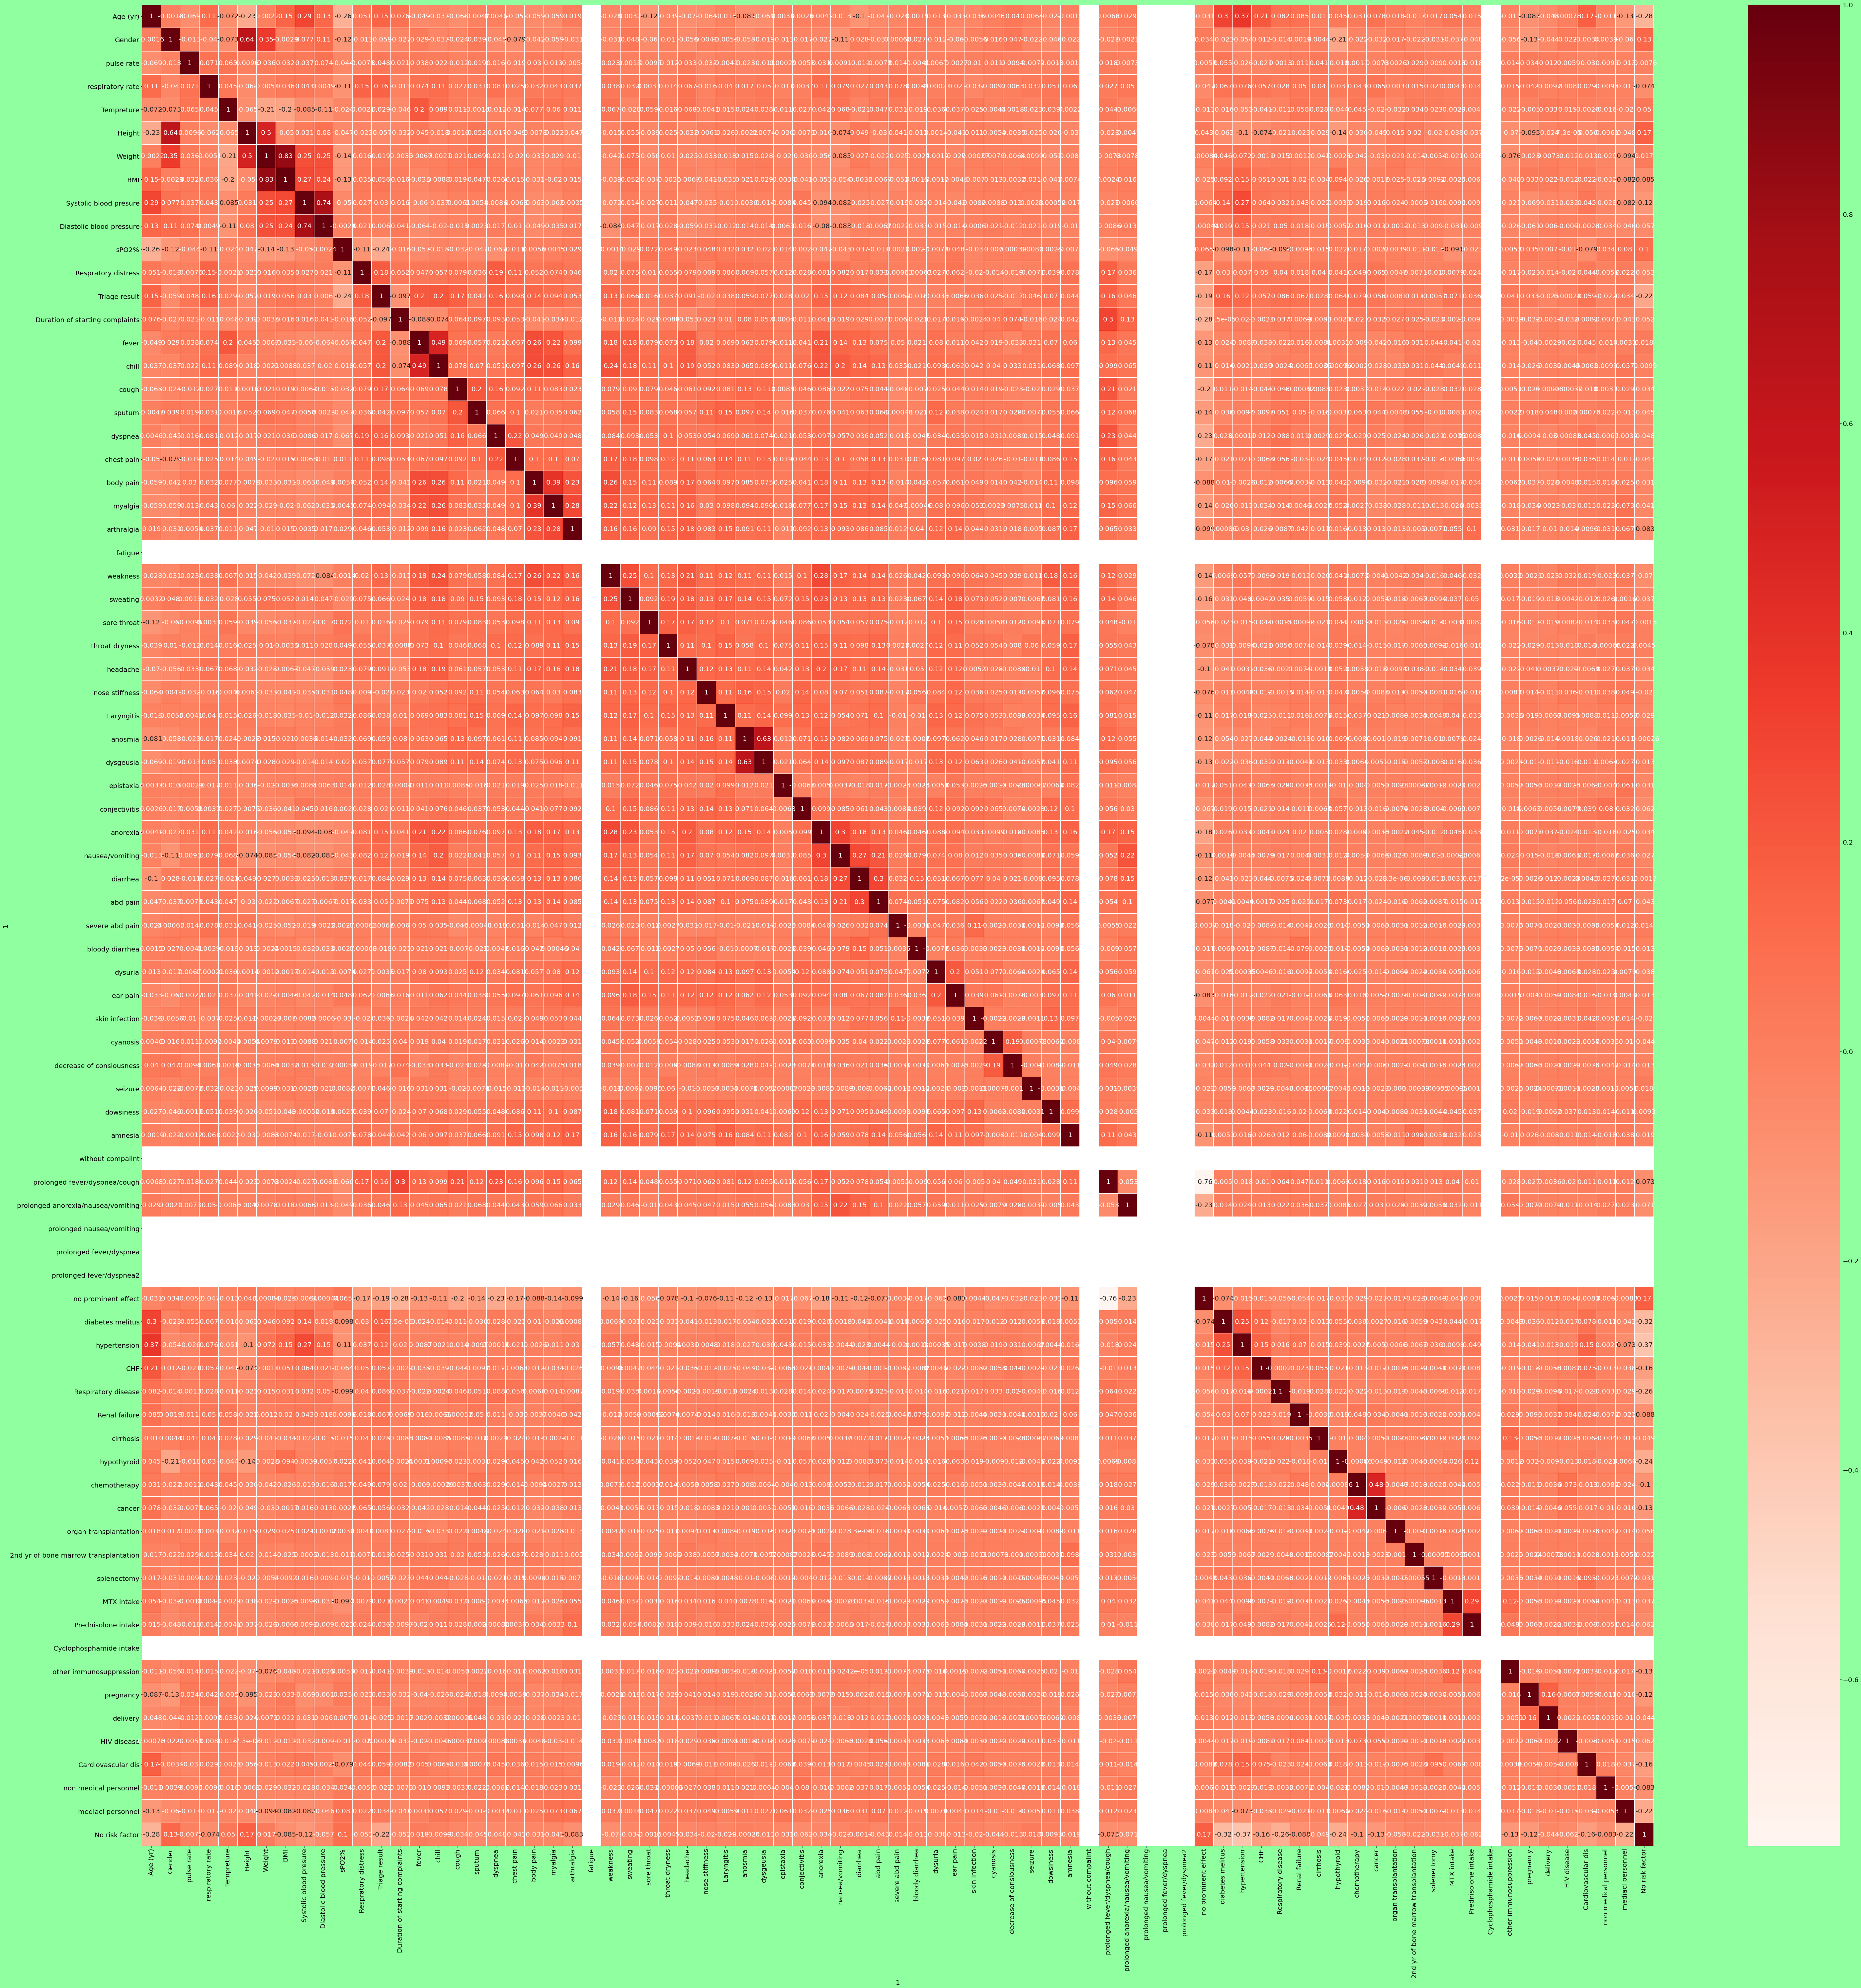

1
Age (yr)                                 0.151446
Gender                                  -0.058628
pulse rate                               0.047508
respiratory rate                         0.158070
Tempreture                               0.028854
Height                                  -0.057116
Weight                                   0.018608
BMI                                      0.055936
Systolic blood presure                   0.029622
Diastolic blood pressure                 0.005987
sPO2%                                   -0.236879
Respratory distress                      0.183566
Triage result                            1.000000
Duration of starting complaints         -0.097245
fever                                    0.196347
chill                                    0.204358
cough                                    0.167014
sputum                                   0.042490
dyspnea                                  0.157203
chest pain                               0.09753

In [43]:
import seaborn as sns
fig = plt.figure(figsize=(102,102))
fig.patch.set_facecolor('xkcd:mint green')
cor = covid_df.corr()
sns.heatmap(cor, annot=True, linewidths=.5, annot_kws={"size": 20}, cmap=plt.cm.Reds)
plt.show()
display(cor['Triage result'])

# Chose most impoertant features

temp = [i for i in features.index]
temp.append('Triage result')
display(temp)
covid_df = covid_df.loc[:, temp]

# Convert to Numeric float values

In [5]:
cols=[i for i in covid_df.columns if i not in ["Gender"]]
covid_df['Triage result'] = covid_df['Triage result'].astype(str)
for col in cols:
    covid_df[col]=pd.to_numeric(covid_df[col])
    covid_df[col]=covid_df[col].astype(np.float64)
display(covid_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2577 entries, 0 to 3479
Columns: 102 entries, Age (yr) to No previous treatment
dtypes: float64(101), object(1)
memory usage: 2.0+ MB


None

# Covid features Correlation

In [6]:
display(covid_df)
covid_df[covid_df.columns].corr()['Triage result']

1     Age (yr)  Gender  pulse rate  respiratory rate  Tempreture  Height  \
0         73.0    male        64.0              22.0        36.6   155.0   
1         29.0  female        80.0              22.0        37.1   165.0   
4         34.0  female       102.0              22.0        37.2   170.0   
5         19.0    male       124.0              20.0        36.9   170.0   
6         13.0  female        89.0              18.0        36.3   155.0   
...        ...     ...         ...               ...         ...     ...   
3474      52.0  female       120.0              19.0        36.0   173.0   
3475      75.0  female        92.0              18.0        37.0   160.0   
3477      39.0  female       125.0              23.0        37.0   162.0   
3478      56.0    male       150.0              24.0        35.0   168.0   
3479      68.0  female        75.0              26.0        36.2   150.0   

1     Weight    BMI  Systolic blood presure  Diastolic blood pressure  sPO2%  \
0       60.0  24.97                   136.0                      41.0   98.0   
1       67.0  24.61                    94.0                      44.0   97.0   
4       53.0  18.34                   114.0                      47.0   96.0   
5       65.0  22.49                   123.0                      50.0   98.0   
6       54.0  22.48                   115.0                      51.0   96.0   
...      ...    ...                     ...                       ...    ...   
3474    85.0  28.40                   156.0                     110.0   97.0   
3475    50.0  19.53                   183.0                     117.0   92.0   
3477   106.0  40.39                   185.0                     125.0   90.0   
3478    65.0  23.03                   231.0                     148.0   90.0   
3479    72.0  32.00                   185.0                     152.0   94.0   

1     Respratory distress  Triage result  Duration of starting complaints  \
0                     0.0            1.0                              1.0   
1                     0.0            1.0                              1.0   
4                     0.0            1.0                              1.0   
5                     0.0            1.0                              4.0   
6                     1.0            1.0                              1.0   
...                   ...            ...                              ...   
3474                  0.0            3.0                              2.0   
3475                  0.0            3.0                              1.0   
3477                  0.0            3.0                              1.0   
3478                  0.0            3.0                              1.0   
3479                  1.0            3.0                              2.0   

1     fever  chill  cough  sputum  dyspnea  chest pain  body pain  myalgia  \
0       0.0    0.0    0.0     0.0      0.0         1.0        0.0      0.0   
1       0.0    1.0    1.0     0.0      0.0         0.0        0.0      1.0   
4       1.0    0.0    0.0     0.0      0.0         0.0        1.0      1.0   
5       0.0    0.0    1.0     0.0      1.0         0.0        0.0      0.0   
6       1.0    1.0    0.0     1.0      1.0         1.0        1.0      1.0   
...     ...    ...    ...     ...      ...         ...        ...      ...   
3474    1.0    1.0    1.0     1.0      1.0         1.0        0.0      0.0   
3475    0.0    0.0    1.0     0.0      0.0         0.0        1.0      1.0   
3477    0.0    0.0    1.0     0.0      1.0         1.0        1.0      0.0   
3478    0.0    0.0    1.0     1.0      0.0         0.0        0.0      0.0   
3479    0.0    1.0    1.0     0.0      1.0         0.0        0.0      0.0   

1     arthralgia  fatigue  weakness  sweating  sore throat  throat dryness  \
0            0.0      0.0       0.0       0.0          0.0             0.0   
1            0.0      0.0       1.0       0.0          1.0             0.0   
4            1.0      0.0     

1
Age (yr)                 0.151446
pulse rate               0.047508
respiratory rate         0.158070
Tempreture               0.028854
Height                  -0.057116
                           ...   
symptomatic therapy      0.025422
AZT                      0.026964
OST                      0.018199
admission                0.007566
No previous treatment   -0.015981
Name: Triage result, Length: 101, dtype: float64

# Covert String Gender to Label

In [7]:
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder() 
covid_df['Gender']= label_encoder.fit_transform(covid_df['Gender']) 
covid_df['Gender'] = covid_df['Gender'].astype(np.float64)

# Delete Imprecise Columns

In [39]:
covid_df = covid_df.drop(covid_df.loc[:,'Lymp<1100':].columns, axis=1)

In [8]:
target = covid_df['Triage result']
train = covid_df.drop('Triage result', axis=1)

In [121]:
from sklearn.feature_selection import VarianceThreshold
print(train.shape)
sel = VarianceThreshold()
sel.fit(train)
train = train[train.columns[sel.get_support(indices=True)]]
print(train.shape)


(2577, 78)
(2577, 72)


In [9]:
from sklearn.feature_selection import SelectKBest, f_classif

print(train.shape)
sel = SelectKBest(f_classif, k=20)
sel.fit(train, target)
train = train[train.columns[sel.get_support(indices=True)]]
print(train.shape)
print(train.columns)

(2577, 101)
(2577, 20)
Index(['Age (yr)', 'respiratory rate', 'sPO2%', 'Respratory distress',
       'Duration of starting complaints', 'fever', 'chill', 'cough', 'dyspnea',
       'chest pain', 'body pain', 'weakness', 'headache', 'anorexia',
       'nausea/vomiting', 'prolonged fever/dyspnea/cough',
       'no prominent effect', 'diabetes melitus', 'hypertension',
       'No risk factor'],
      dtype='object', name=1)


/home/sspc/anaconda3/envs/DecisionTree_MashinLearning/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [22 48 51 52 53 69 91] are constant.
  UserWarning)
/home/sspc/anaconda3/envs/DecisionTree_MashinLearning/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


# Apply Cutoff For Being Sick    # Not Useful

def apply_cutoff(x, cut_off, compare):
    if compare == "higher":
        if x >= cut_off:
            return 1
        else:
            return 0
    else:
        if x <= cut_off:
            return 1
        else:
            return 0
    

covid_df['Systolic blood presure'] = covid_df['Systolic blood presure'].apply(lambda x : apply_cutoff(x, 140, "higher"))
covid_df['Diastolic blood pressure'] = covid_df['Diastolic blood pressure'].apply(lambda x : apply_cutoff(x, 90, "higher"))
covid_df['sPO2%'] = covid_df['sPO2%'].apply(lambda x : apply_cutoff(x, 95, "lower"))

# Drop Columns with x10 different  # Not Useful

for column in covid_df.columns:
    column_count = Counter(list(covid_df[column].values))
    x, y = zip(*column_count.most_common(15))
    if (len(y) == 2 and (y[0] >= 10 * y[1] or y[1] >= 10 * y[0])) or len(y) == 1:
        covid_df = covid_df.drop(column, axis=1)


# Check if we have only 2 Class  # Not Useful

covid_df['Triage result'] = covid_df['Triage result'].apply(lambda x: x if x == 1 else 2)
display(Counter(covid_df['Triage result']))

# Seperating Target and Train 

In [10]:
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2, stratify=target, random_state=14)

print("Test: Number of each Class: " , sorted(Counter(y_test).items()), " Number of Samples: " ,len(x_test))
print("Train: Number of each Class: " , sorted(Counter(y_train).items()), " Number of Samples: " ,len(x_train))

Test: Number of each Class:  [(1.0, 225), (2.0, 261), (3.0, 30)]  Number of Samples:  516
Train: Number of each Class:  [(1.0, 899), (2.0, 1041), (3.0, 121)]  Number of Samples:  2061


# Fit function

import matplotlib.pyplot as plt
from sklearn import metrics
def roccurve(y_values, y_preds_proba):
    fpr, tpr, _ = metrics.roc_curve(y_values, y_preds_proba)
    xx = np.arange(101) / float(100)
    aur = metrics.auc(fpr,tpr)

    plt.xlim(0, 1.0)
    plt.ylim(0, 1.25)
    plt.plot([0.0, 0.0], [0.0, 1.0], color='green', linewidth=8)
    plt.plot([0.0, 1.0], [1.0, 1.0], color='green', label='Perfect Model', linewidth=4)
    plt.plot(xx,xx, color='blue', label='Random Model')
    plt.plot(fpr,tpr, color='red', label='User Model')
    plt.title("ROC Curve - AUR value ="+str(aur))
    plt.xlabel('% false positives')
    plt.ylabel('% true positives')
    plt.legend()
    plt.show()


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Ridge, LassoCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel

def fit(x_train, y_train, x_test, y_test, show_output=False):
#         regr = RandomForestClassifier(n_estimators=700, min_samples_split=12, min_samples_leaf=2,
#                                       max_features=sqrt(78), max_depth=13, bootstrap=False)
#         regr = VotingClassifier([('RF', RandomForestClassifier(n_estimators=50, max_features=5)), ('RF1', RandomForestClassifier(n_estimators=50, max_features=10))], voting='hard')
#         regr.fit(x_train, y_train)
    
        # Number of trees in random forest
        n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
        # Number of features to consider at every split
        max_features = ['auto', 'sqrt']
        # Maximum number of levels in tree
        max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
        max_depth.append(None)
        # Minimum number of samples required to split a node
        min_samples_split = [2, 5, 10]
        # Minimum number of samples required at each leaf node
        min_samples_leaf = [1, 2, 4]
        # Method of selecting samples for training each tree
        bootstrap = [True, False]
        # Create the random grid
        random_grid = {'n_estimators': n_estimators,
                       'max_features': max_features,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf,
                       'bootstrap': bootstrap}
        print(random_grid)
    
        # Use the random grid to search for best hyperparameters
        # First create the base model to tune
        regr = RandomForestClassifier()
        # Random search of parameters, using 3 fold cross validation, 
        # search across 100 different combinations, and use all available cores
        rf_random = RandomizedSearchCV(estimator = regr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
        # Fit the random search model
        rf_random.fit(x_train, y_train)
        print(rf_random.best_params_)
        
        regr = rf_random.best_estimator_
#         regr = LassoCV()
#         regr = SelectFromModel(regr)
#         regr = VotingClassifier([('RF1', regr), ('RF2', regr), ('RF3', regr)], voting='soft')
        regr.fit(x_train, y_train)
        
        y_predict_test = regr.predict(x_test)
        y_predict_train = regr.predict(x_train)
        target_names = ['class 1', 'class 2', 'class 3']
        if show_output:
            df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict_test})
            print(df)

        print("########### Test Error  ###########")
        accuracy = regr.score(x_test, y_test)
        print('Accuracy is : ', accuracy_score(y_test, y_predict_test))
        scores = cross_val_score(regr, x_test, y_test, cv=5)
        print('Cross Score is: ', scores.mean())
        print(classification_report(y_test, y_predict_test, target_names=target_names))
        plot_confusion_matrix(regr, x_test, y_test)
        plt.grid('off')
        plt.show()
        
#         y_pred_proba = regr.predict_proba(X=x_test)
#         roccurve(y_values=y_test, y_preds_proba=y_pred_proba[:,1])

        
        print("########### Train Error ###########")
        accuracy = regr.score(x_train, y_train)
        print('Accuracy is : ', accuracy_score(y_train, y_predict_train))
        scores = cross_val_score(regr, x_test, y_test, cv=5)
        print('Cross Score is: ', scores.mean())
        print(classification_report(y_train, y_predict_train, target_names=target_names))
        plot_confusion_matrix(regr, x_train, y_train)
        plt.grid('off')
        plt.show()
        
#         y_pred_proba = regr.predict_proba(X=x_train)
#         roccurve(y_values=y_train, y_preds_proba=y_pred_proba[:,1])

        
        print(regr.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
        #plot graph of feature importances for better visualization
        feat_importances = pd.Series(regr.feature_importances_, index=x_train.columns)
        feat_importances.nlargest(15).plot(kind='barh')
        plt.show()
        
        from sklearn.feature_selection import SelectFromModel
        clf = regr
        sel = SelectFromModel(clf, prefit=True)
        train_score = clf.score(x_train, y_train)
        test_score = clf.score(x_test, y_test)
        column_res = model.transform(x_train).shape
        selected_feat = x_train.columns[(sel.get_support())]
        print(train_score, test_score)
        print(len(selected_feat), selected_feat)

        sel = SelectFromModel(clf)
        sel.fit(x_train, y_train)
        sel.get_support()
        selected_feat= x_train.columns[(sel.get_support())]
        print(len(selected_feat), selected_feat)
        
#         display(pd.Series(sel.estimator_,sel.estimator_.feature_importances_.ravel()).hist())
        
        import os
        from sklearn.tree import export_graphviz
        import six
        import pydot
        from sklearn import tree
        dotfile = six.StringIO()
        i_tree = 0
        for tree_in_forest in regr.estimators_:
            export_graphviz(tree_in_forest,out_file='tree.dot',
            feature_names=x_train.columns,
            filled=True,
            rounded=True)
            (graph,) = pydot.graph_from_dot_file('tree.dot')
            name = 'tree' + str(i_tree)
            graph.write_png(name+  '.png')
            os.system('dot -Tpng tree.dot -o tree.png')
            i_tree +=1
            if i_tree == 2:
                break
        
        
        return feat_importances.index

# Scale Features

In [14]:
columns_name = x_train.columns
scaler = MinMaxScaler()
x_train_scale = pd.DataFrame(scaler.fit_transform(x_train), columns=columns_name)
x_test_scale = pd.DataFrame(scaler.fit_transform(x_test), columns=columns_name)
display(x_train_scale.describe())

1         Age (yr)  respiratory rate        sPO2%  Respratory distress  \
count  2061.000000       2061.000000  2061.000000          2061.000000   
mean      0.354823          0.321241     0.893027             0.107715   
std       0.169993          0.090860     0.055647             0.310095   
min       0.000000          0.000000     0.000000             0.000000   
25%       0.232558          0.269231     0.861111             0.000000   
50%       0.325581          0.307692     0.888889             0.000000   
75%       0.453488          0.384615     0.916667             0.000000   
max       1.000000          1.000000     1.000000             1.000000   

1      Duration of starting complaints        fever        chill        cough  \
count                      2061.000000  2061.000000  2061.000000  2061.000000   
mean                          0.260553     0.281902     0.282872     0.502669   
std                           0.317568     0.450035     0.450504     0.500114   
min                           0.000000     0.000000     0.000000     0.000000   
25%                           0.000000     0.000000     0.000000     0.000000   
50%                           0.000000     0.000000     0.000000     1.000000   
75%                           0.333333     1.000000     1.000000     1.000000   
max                           1.000000     1.000000     1.000000     1.000000   

1          dyspnea   chest pain    body pain     weakness     headache  \
count  2061.000000  2061.000000  2061.000000  2061.000000  2061.000000   
mean      0.364386     0.228530     0.330907     0.249879     0.214459   
std       0.481374     0.419988     0.470654     0.433048     0.410546   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

1         anorexia  nausea/vomiting  prolonged fever/dyspnea/cough  \
count  2061.000000      2061.000000                    2061.000000   
mean      0.157205         0.176613                       0.293547   
std       0.364083         0.381434                       0.455497   
min       0.000000         0.000000                       0.000000   
25%       0.000000         0.000000                       0.000000   
50%       0.000000         0.000000                       0.000000   
75%       0.000000         0.000000                       1.000000   
max       1.000000         1.000000                       1.000000   

1      no prominent effect  diabetes melitus  hypertension  No risk factor  
count          2061.000000       2061.000000   2061.000000     2061.000000  
mean              0.583212          0.081029      0.107715        0.546822  
std               0.493147          0.272945      0.310095        0.497924  
min               0.000000          0.000000      0.000000        0.000000  
25%               0.000000          0.000000      0.000000        0.000000  
50%               1.000000          0.000000      0.000000        1.000000  
75%               1.000000          0.000000      0.000000        1.000000  
max               1.000000          1.000000      1.000000        1.000000

# Over Sampling with Different Algorithms

# # Over Sampler

In [15]:
ros = RandomOverSampler(random_state=0)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)
x_train_ros_scale, y_train_ros_scale = ros.fit_resample(x_train_scale, y_train)
print(sorted(Counter(y_train_ros).items()))
print(sorted(Counter(y_train_ros_scale).items()))

[(1.0, 1041), (2.0, 1041), (3.0, 1041)]
[(1.0, 1041), (2.0, 1041), (3.0, 1041)]


# # Smote # Not UseFul

x_train_smote, y_train_smote = SMOTE().fit_resample(x_train, y_train)
print(sorted(Counter(y_train_smote).items()))

# # Adasyn # Not UseFul

x_train_adasyn, y_train_adasyn = ADASYN(sampling_strategy='minority').fit_resample(x_train, y_train)
print(sorted(Counter(y_train_adasyn).items()))

# Display Train And Target Values

In [16]:
display(x_train_ros)
display(y_train_ros)

1     Age (yr)  respiratory rate  sPO2%  Respratory distress  \
0         49.0              24.0   96.0                  0.0   
1         39.0              20.0   95.0                  0.0   
2         47.0              20.0   95.0                  0.0   
3         64.0              18.0   97.0                  0.0   
4         29.0              20.0   99.0                  0.0   
...        ...               ...    ...                  ...   
3118      33.0              20.0   95.0                  0.0   
3119      39.0              22.0   95.0                  0.0   
3120      64.0              24.0   94.0                  0.0   
3121      67.0              21.0   83.0                  0.0   
3122      43.0              20.0   95.0                  0.0   

1     Duration of starting complaints  fever  chill  cough  dyspnea  \
0                                 1.0    0.0    0.0    1.0      1.0   
1                                 1.0    0.0    0.0    0.0      0.0   
2                                 2.0    1.0    0.0    1.0      1.0   
3                                 2.0    0.0    0.0    0.0      0.0   
4                                 1.0    0.0    0.0    0.0      0.0   
...                               ...    ...    ...    ...      ...   
3118                              2.0    1.0    1.0    1.0      1.0   
3119                              1.0    1.0    1.0    0.0      1.0   
3120                              1.0    1.0    1.0    0.0      1.0   
3121                              3.0    0.0    0.0    0.0      1.0   
3122                              3.0    0.0    1.0    0.0      1.0   

1     chest pain  body pain  weakness  headache  anorexia  nausea/vomiting  \
0            0.0        0.0       1.0       0.0       0.0              0.0   
1            0.0        0.0       0.0       0.0       0.0              0.0   
2            1.0        0.0       0.0       0.0       1.0              0.0   
3            0.0        0.0       0.0       0.0       0.0              0.0   
4            0.0        0.0       0.0       0.0       0.0              0.0   
...          ...        ...       ...       ...       ...              ...   
3118         0.0        0.0       0.0       0.0       0.0              0.0   
3119         0.0        1.0       1.0       0.0       0.0              0.0   
3120         0.0        0.0       1.0       0.0       0.0              0.0   
3121         0.0        0.0       1.0       0.0       0.0              0.0   
3122         1.0        0.0       1.0       1.0       1.0              1.0   

1     prolonged fever/dyspnea/cough  no prominent effect  diabetes melitus  \
0                               0.0                  1.0               1.0   
1                               0.0                  1.0               0.0   
2                               1.0                  0.0               0.0   
3                               0.0                  1.0               1.0   
4                               0.0                  1.0               0.0   
...                             ...                  ...               ...   
3118                            0.0                  1.0               0.0   
3119                            0.0                  1.0               0.0   
3120                            0.0                  1.0               0.0   
3121                            1.0                  0.0               0.0   
3122                            0.0                  0.0               0.0   

1     hypertension  No risk factor  
0              0.0             0.0  
1              0.0             1.0  
2              0.0             0.0  
3              1.0             0.0  
4              0.0             1.0  
...            ...             ...  
3118           0.0             1.0  
3119           0.0             1.0  
3120           0.0             1.0  
3121           0.0             0.0  
3122           0.0             1.0  

[3123 rows x 20 columns]

0       2.0
1       1.0
2       2.0
3       1.0
4       1.0
       ... 
3118    3.0
3119    3.0
3120    3.0
3121    3.0
3122    3.0
Name: Triage result, Length: 3123, dtype: float64

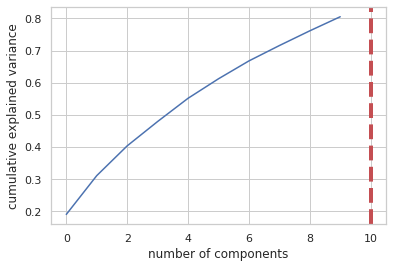

None

Cumulative Variance Ratio  Explained Variance Ratio
0                   0.190342                  0.190342
1                   0.310925                  0.120583
2                   0.403535                  0.092610
3                   0.479272                  0.075737
4                   0.551563                  0.072291
5                   0.612228                  0.060665
6                   0.667809                  0.055581
7                   0.715578                  0.047768
8                   0.761435                  0.045857
9                   0.805240                  0.043805

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca_test = PCA(n_components=10)
pca_test.fit(x_train_scale)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [21]:
pca = PCA(n_components=10)
pca.fit(x_train_scale)
x_train_scaled_pca = pca.transform(x_train_scale)
x_test_scaled_pca = pca.transform(x_test_scale)

In [22]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=x_train_scale.columns, index=pca_dims)
pca_test_df.head(10).T

PCA Component 0  PCA Component 1  \
1                                                                   
Age (yr)                               -0.004289        -0.033662   
respiratory rate                        0.014124         0.007061   
sPO2%                                  -0.006340         0.004132   
Respratory distress                     0.103298        -0.050355   
Duration of starting complaints         0.093640        -0.181566   
fever                                   0.253486         0.403577   
chill                                   0.270367         0.419992   
cough                                   0.269106        -0.153459   
dyspnea                                 0.256576        -0.205688   
chest pain                              0.219107         0.001274   
body pain                               0.252010         0.369114   
weakness                                0.255777         0.239061   
headache                                0.177646         0.202368   
anorexia                                0.209513         0.150879   
nausea/vomiting                         0.153468         0.148315   
prolonged fever/dyspnea/cough           0.420300        -0.346265   
no prominent effect                    -0.480502         0.367319   
diabetes melitus                        0.018610        -0.036918   
hypertension                            0.025001        -0.029978   
No risk factor                         -0.142302         0.148247   

                                 PCA Component 2  PCA Component 3  \
1                                                                   
Age (yr)                                0.118748         0.005938   
respiratory rate                        0.011054        -0.006572   
sPO2%                                  -0.010534         0.000887   
Respratory distress                    -0.011768        -0.046626   
Duration of starting complaints        -0.020975         0.071473   
fever                                  -0.046488         0.247839   
chill                                   0.003608         0.154214   
cough                                  -0.203108        -0.545946   
dyspnea                                -0.166791        -0.471410   
chest pain                             -0.029792        -0.268860   
body pain                               0.008492        -0.145801   
weakness                                0.115525        -0.131069   
headache                                0.039748        -0.089399   
anorexia                                0.010661         0.010296   
nausea/vomiting                         0.034529         0.010582   
prolonged fever/dyspnea/cough          -0.122929         0.333275   
no prominent effect                     0.021119        -0.376000   
diabetes melitus                        0.220001        -0.030190   
hypertension                            0.316964        -0.042927   
No risk factor                         -0.855702         0.114075   

                                 PCA Component 4  PCA Component 5  \
1                                                                   
Age (yr)                                0.003788        -0.037180   
respiratory rate                        0.009254        -0.017530   
sPO2%                                  -0.000838         0.011277   
Respratory distress                     0.100334        -0.066574   
Duration of starting complaints         0.009226         0.057138   
fever                                  -0.111848        -0.456153   
chill                                  -0.034132        -0.417732   
cough                                  -0.705334        -0.069562   
dyspnea                                 0.536358        -0.404615   
chest pain                              0.307197         0.071294   
body pain                              -0.157943         0.254160   
weakness                                0.120437         0.428909   
headache                     

In [23]:
ros = RandomOverSampler(random_state=0)
x_train_ros_scale_pca, y_train_ros_scale_pca = ros.fit_resample(x_train_scaled_pca, y_train)
print(sorted(Counter(y_train_ros).items()))

[(1.0, 1041), (2.0, 1041), (3.0, 1041)]


# Final Results

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.4min finished


{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}
########### Test Error  ###########
Accuracy is :  0.625968992248062
Cross Score is:  0.6201269604182226
              precision    recall  f1-score   support

     class 1       0.63      0.60      0.61       225
     class 2       0.63      0.69      0.65       261
     class 3       0.56      0.33      0.42        30

    accuracy                           0.63       516
   macro avg       0.60      0.54      0.56       516
weighted avg       0.62      0.63      0.62       516



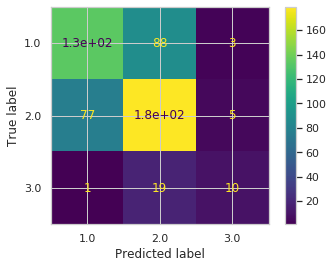

########### Train Error ###########
Accuracy is :  0.983669548511047
Cross Score is:  0.6066094100074683
              precision    recall  f1-score   support

     class 1       0.97      0.98      0.98      1041
     class 2       0.98      0.97      0.98      1041
     class 3       1.00      1.00      1.00      1041

    accuracy                           0.98      3123
   macro avg       0.98      0.98      0.98      3123
weighted avg       0.98      0.98      0.98      3123



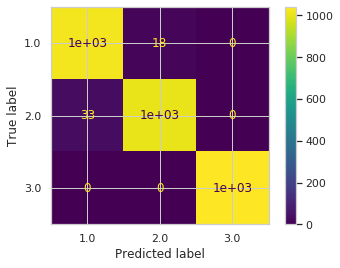

[0.17665818 0.0988437  0.20406396 0.0360889  0.05991779 0.03154037
 0.0306529  0.03218087 0.04065233 0.02582694 0.03321267 0.0295175
 0.02700224 0.02216215 0.02460253 0.02235635 0.03304204 0.01913108
 0.01746345 0.03508406]


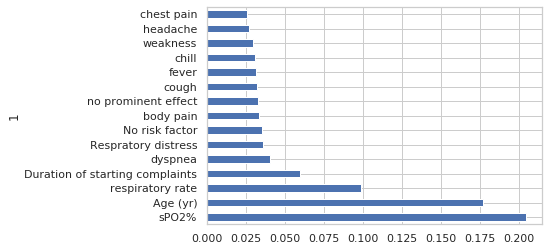

NameError: name 'model' is not defined

In [24]:
features = fit(x_train_ros, y_train_ros, x_test, y_test)

In [ ]:
features = fit(x_train_ros_scale, y_train_ros, x_test_scale, y_test)

In [ ]:
features = fit(x_train_ros_scale_pca, y_train_ros_scale_pca, x_test_scaled_pca, y_test)

# 1) ROC Curve
# 2) Tafkik be 7 ta , Model
# 3) KNN, and cluster